# Fashiongen - subset

In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

---

In [2]:
dataset_h5_filename = '/media/ai/backup/datasets/fashiongen/fashiongen_256_256_train.h5'

# open the file
file_h5 = h5py.File(dataset_h5_filename, mode='r')

In [3]:
print('number of samples = %d' % (len(file_h5['input_description'])))

print 'Caption of the first sample:'
desc = str(file_h5['input_description'][0])
print(desc)

index = desc.find('.')
if index is not -1:
    desc = desc[:index]
print('only first sentence: %s' % (desc))

number of samples = 260490
Caption of the first sample:
['Long sleeve coated denim shirt in indigo blue. Irregular overdye effect throughout in black. Spread collar. Flap pockets at breast, one with metallic logo piece. Press-stud closure at front. Tonal stitching. Three press-studs at barrel cuffs.']
only first sentence: ['Long sleeve coated denim shirt in indigo blue


caterory: ['SHIRTS']
<type 'numpy.ndarray'>


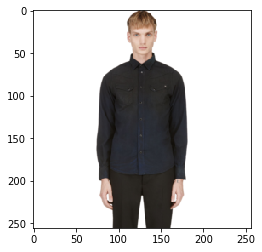

In [4]:
print('caterory: %s' % (file_h5['input_category'][0]))
print type(file_h5['input_category'][0])

image = Image.fromarray(file_h5['input_image'][0].astype('uint8'), 'RGB')
plt.imshow(image)

---

## Make a subset of 8 categories

In [5]:
selected_categories = ['TOPS', 'SWEATERS', 'PANTS', 'JEANS', 'SHIRTS', 'DRESSES', 'SHORTS', 'SKIRTS']

In [6]:
subset_indexes = []
for i in range(len(file_h5['input_category'])):
    if file_h5['input_category'][i] in selected_categories:
        subset_indexes.append(i)

In [7]:
print('subset count = %d/%d' % (len(subset_indexes), len(file_h5['input_description'])))
subset_indexes[:30]

subset count = 164352/260490


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 32,
 33]

## How many items per categories

In [8]:
categories_count = np.zeros(len(selected_categories))

for i in subset_indexes:
    cat = file_h5['input_category'][i]
    
    for j in range(len(selected_categories)):
        if cat == selected_categories[j]:
            categories_count[j] += 1
            break

categories_count     

array([47764., 44591., 23230., 13586., 11398.,  9458.,  7416.,  6909.])